# Digit recognition with Deep Learning

First: import packages <br>
NumPy is pre-installed, if you use anaconda. But you'll need to install Keras, the framework for an easy use of tensorflow with Python. I used conda install: https://anaconda.org/conda-forge/keras.

In [6]:
import numpy as np
import keras

#just for visualizing, not needed for the actual network
import matplotlib.pyplot as plt

We use the MNIST dataset, which is already built-in to Keras: https://keras.io/api/datasets/mnist/. <br>
It consists of 60'000 labelled and already pre-processed images of handwritten digits + additional 10'000 for testing/validaton. 

In [2]:
#load the data (training and validation) and its labels into different variables
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

<code>x_train</code>
holds now 60'000 images, saved as numpy.ndarray. You can acess them by indexing:
<code>x_train[x]</code><br>
Let's have a look at an example:

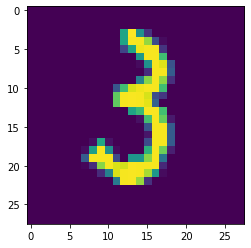

In [9]:
plt.imshow(x_train[1234])
plt.show()

A bit of pre-processing is still needed. Since we want to pass the images as a string of numbers an not an array to network, we have to flatten the arrays:<br>
In the end we want an array with the shape <code>(60000,784)</code>, which means 60'000 1D-vectors with the length $28^2^=784$, saved in one big array. <br>
Exactly the same applies also to the test data <code> x_test </code>.

In [ ]:
#flatten 2D to 1D: from 28x28 img, to a string of 28**2 numbers
x_train = np.resize(x_train, (np.shape(x_train)[0],np.shape(x_train)[1]**2))
x_test = np.resize(x_test, (np.shape(x_test)[0],np.shape(x_test)[1]**2))

#check the shape
print("x_train shape:", x_train.shape)

Also the labels need a quick adjustment. Since we want to predict classes, we change them to class matrices.

In [6]:
num_classes = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Next up, buliding the Neural Network! <br>
<code>keras.layers</code> to add differetn types of layers in the desired order. This architecture can be modified by adding/removing layers or change the number of neurons in the hidden layers, play around! <br>
After that the model needs to be compiled <code>model.compile()</code>. There a loss function and a optimizer are chosen, this can also be changed. See https://keras.io/api/losses/ or https://keras.io/api/optimizers/ for different options.

In [2]:
size = 28*28

###defining network
input_shape = (size,)

inp = keras.layers.Input(shape=input_shape)

hidden1 = keras.layers.Dense(15, activation='relu')(inp)
hidden2 = keras.layers.Dense(15, activation='relu')(hidden1)

out = keras.layers.Dense(10, activation='sigmoid')(hidden2)

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
Total params: 12,175
Trainable params: 12,175
Non-trainable params: 0
_________________________________________________________________
None


2022-01-10 10:40:12.931667: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-10 10:40:12.932028: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Next step is training. 10% of the training data are used as validation to check the generalizing ability of the network during training.

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 4s 68us/step - loss: 0.4235 - accuracy: 0.8977 - val_loss: 0.2168 - val_accuracy: 0.9121
Epoch 2/15
54000/54000 [==============================] - 3s 52us/step - loss: 0.2145 - accuracy: 0.9173 - val_loss: 0.1994 - val_accuracy: 0.9182
Epoch 3/15
54000/54000 [==============================] - 3s 51us/step - loss: 0.2010 - accuracy: 0.9226 - val_loss: 0.1885 - val_accuracy: 0.9273
Epoch 4/15
54000/54000 [==============================] - 3s 51us/step - loss: 0.1855 - accuracy: 0.9297 - val_loss: 0.1589 - val_accuracy: 0.9378
Epoch 5/15
54000/54000 [==============================] - 3s 51us/step - loss: 0.1595 - accuracy: 0.9374 - val_loss: 0.1469 - val_accuracy: 0.9388
Epoch 6/15
54000/54000 [==============================] - 3s 54us/step - loss: 0.1499 - accuracy: 0.9395 - val_loss: 0.1353 - val_accuracy: 0.9422
Epoch 7/15
54000/54000 [==============================] - 3s 51us/ste

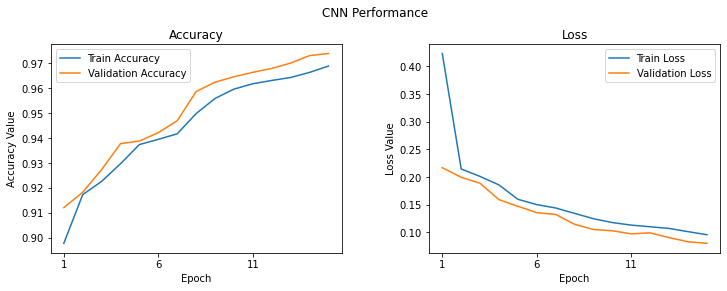

In [8]:
batch_size = 64
epochs = 15

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

This block of code is for plotting the training metrics:

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

As a last step we let the network classify the up to now unseen <code>x_test</code>-data and check how it's performing on that data set.

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.09120557997822762
Test accuracy: 0.9703001976013184
